# Задача 1

Для выборки N=100, представленной вариационным рядом

| xi | -1 | 0 | 1  | 2  | 3  | 4  | 5 |
|----|----|---|----|----|----|----|---|
| ni | 4  | 6 | 12 | 18 | 31 | 23 | 6 |

- Построить полигон относительных частот и гистограмму накопленных частот.

- Найти выборочное среднее и выборочное среднее квадратичное отклонение.

- Определить доверительный интервал с доверительной вероятностью \alpha=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.

- Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости a=0,05.

- Для вычислений можно использовать язык программирования.

## Решение

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

xi = np.array([-1, 0, 1, 2, 3, 4, 5])
ni = np.array([4, 6, 12, 18, 31, 23, 6])

# относительные частоты
wi = ni / ni.sum()

df = pd.DataFrame({
    "xi": xi,
    "ni": ni,
    "wi": wi
})

print(df)

   xi  ni    wi
0  -1   4  0.04
1   0   6  0.06
2   1  12  0.12
3   2  18  0.18
4   3  31  0.31
5   4  23  0.23
6   5   6  0.06


### Полигон относительных частот

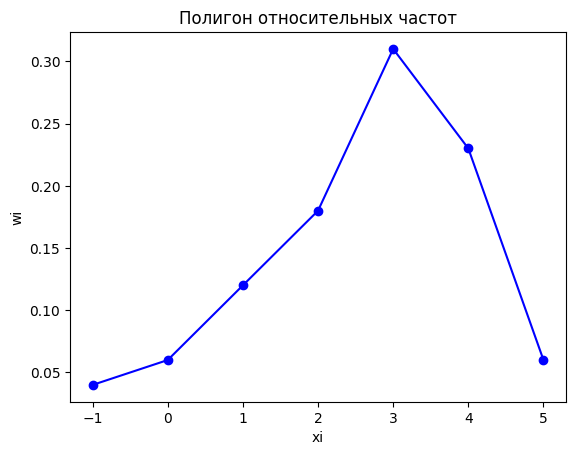

In [69]:
plt.title("Полигон относительных частот")
plt.xlabel("xi")
plt.ylabel("wi")
plt.plot(df.xi, df.wi, 'o-b')
# plt.bar(df.xi, df.wi)
plt.show()

### Гистограмма накопленных частот

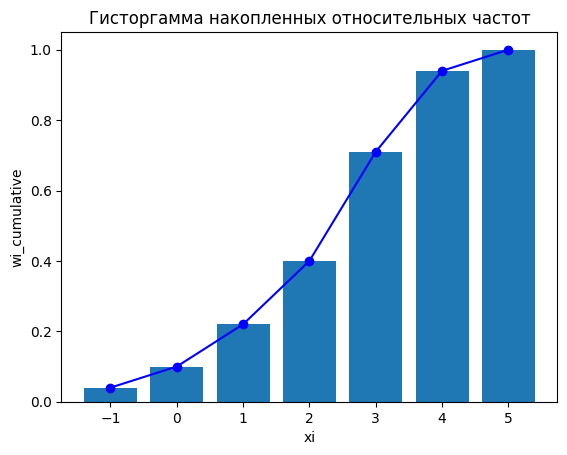

In [70]:
# для относительных частот
df["wi_cumulative"] = df.wi.cumsum() 
plt.title("Гисторгамма накопленных относительных частот")
plt.xlabel("xi")
plt.ylabel("wi_cumulative")
plt.bar(df.xi, df["wi_cumulative"])
plt.plot(df.xi, df["wi_cumulative"], 'o-b')
plt.show()

### Выборочное среднее и выборочное среднее квадратичное отклонение

In [71]:
# Находим выборочную среднюю и дисперсию методом произведений согласно [2, с.180]

xi_v = np.array([-1,  0,   1,   2,  3,  4, 5])
ni_v = np.array([ 4,  6,  12,  18, 31, 23, 6])
ui_v = np.array([-4, -3,  -2,  -1,  0,  1, 2])

dv = pd.DataFrame({
    "xi": xi_v,
    "ni": ni_v,
    "ui": ui_v, 
})

dv["ni_ui"] = dv.ni * dv.ui
dv["ni_ui2"] = dv.ni * (dv.ui ** 2)

## проверка правильности заполнения таблицы
n = dv.ni.sum()
n1 = (dv.ni * ((dv.ui + 1) ** 2)).sum()
n2 = dv.ni_ui2.sum() + 2 * dv.ni_ui.sum() + n
assert(n1 == n2)

# условные моменты первого и второго порядков
M1_usl = dv.ni_ui.sum()/n
M2_usl = dv.ni_ui2.sum()/n

h = 1 # шаг интервала 
C = 3 # ложный ноль = xi_n при максимальной частоте ni_n

xb = M1_usl * h + C
db = (M2_usl - M1_usl ** 2) * (h ** 2)

print(f"Выборочное среднее   = {xb}")
print(f"Выборочная дисперсия = {db}")

Выборочное среднее   = 2.59
Выборочная дисперсия = 2.1419


In [72]:
s2 = (n / (n-1)) * db
s = math.sqrt(s2)
print(f"Несмещенная выборочная дисперсия = {s2:7.4f}")
print(f"Несмещенное выборочное среднее квардатичное отклонение = {s:7.4f}")

Несмещенная выборочная дисперсия =  2.1635
Несмещенное выборочное среднее квардатичное отклонение =  1.4709


### Доверительный интервал

Определить доверительный интервал с доверительной вероятностью y=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.


In [73]:
print(f"Объем выборки n = {n}")
print(f"Выборочное среднее xb = {xb}")
print(f"Среднее кв."
      f" отклонение s = {s:7.4f}")

t_minus, t_plus = stats.norm.interval(confidence = 0.95)
print(f"t-параметры: ({t_minus:7.4f}; {t_plus:7.4f})")

delta_minus = xb + t_minus * s / math.sqrt(n)
delta_plus = xb + t_plus * s / math.sqrt(n)

print(f"Доверительный интервал: ({delta_minus:7.4f} < {xb} < {delta_plus:7.4f})")


Объем выборки n = 100
Выборочное среднее xb = 2.59
Среднее кв. отклонение s =  1.4709
t-параметры: (-1.9600;  1.9600)
Доверительный интервал: ( 2.3017 < 2.59 <  2.8783)


### Проверка гипотезы о нормальности закона распределения 

Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости ${\alpha}=0,05$.

Гипотеза H0: генеральная совокупность распределена по нормальному закону.

Для соблюдения условия ${n_i}>=5$, объединим первый и второй интервал и их частоты в выборке:

In [74]:
# Находим выборочную среднюю и дисперсию методом произведений согласно [2, с.180]

xi_n = np.array([ 0,  1,  2,  3,  4, 5])
ni_n = np.array([10, 12, 18, 31, 23, 6])
ui_n = np.array([-3, -2, -1,  0,  1, 2])

dx = pd.DataFrame({
    "xi": xi_n,
    "ni": ni_n,
    "uin": ui_n, 
})

dx["ni_ui"] = dx.ni * dx.uin
dx["ni_ui2"] = dx.ni * (dx.uin ** 2)

n = dx.ni.sum()
n1 = (dx.ni*((dx.uin + 1) ** 2)).sum()
n2 = dx.ni_ui2.sum() + 2 * dx.ni_ui.sum() + n
assert(n1 == n2)

M1_usl = dx.ni_ui.sum()/n
M2_usl = dx.ni_ui2.sum()/n

h = 1 
C = 3

xb = M1_usl * h + C
db = (M2_usl - M1_usl ** 2) * (h ** 2)
s2 = (n / (n-1)) * db
sigma = math.sqrt(s2)

print(f"Выборочное среднее    = {xb:7.4f}")
print(f"Выборочная дисперсия  = {db:7.4f}")
print(f"Выборочное ср.кв.откл = {sigma:7.4f}")

Выборочное среднее    =  2.6300
Выборочная дисперсия  =  1.8931
Выборочное ср.кв.откл =  1.3828


In [75]:
# Критерий Пирсона
'''
Эмпирическое распределение задано в виде последовательности равностоящих вариант и соответствующих им частот.
Расчет ведем согласно [2, с.250]
'''

dh = pd.DataFrame({
    "ni": ni_n,
    "xi": xi_n,
})

n = dh.ni.sum()

dh["ui"] = (dh.xi - xb)/sigma
dh["pi"] = stats.norm.pdf(dh.ui)
dh["ni_teor"] = (dh.pi * n * h) / sigma
dh["chi2"] = ((dh.ni - dh.ni_teor) ** 2) / dh.ni_teor

print(dh)

chi2_nab = dh.chi2.sum()
print(f"Наблюдаемое значение хи-квадрат = {chi2_nab:7.4f}")

   ni  xi        ui        pi    ni_teor      chi2
0  10   0 -1.901895  0.065380   4.727971  5.878694
1  12   1 -1.178741  0.199159  14.402234  0.400683
2  18   2 -0.455587  0.359616  26.005781  2.464549
3  31   3  0.267567  0.384914  27.835233  0.359823
4  23   4  0.990721  0.244216  17.660571  1.614302
5   6   5  1.713875  0.091848   6.642011  0.062056
Наблюдаемое значение хи-квадрат = 10.7801


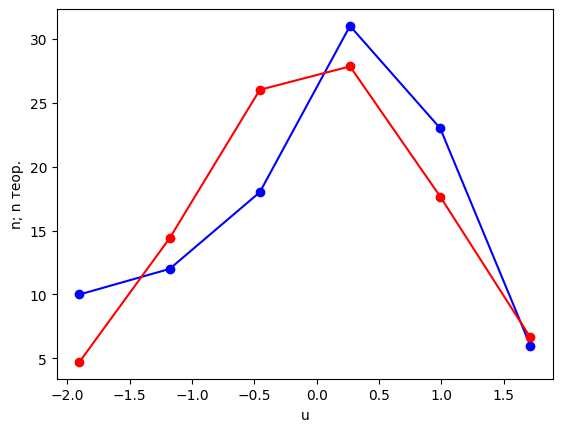

In [80]:
plt.plot(dh.ui, dh.ni, 'o-b')
plt.plot(dh.ui, dh.ni_teor, 'o-r')
plt.xlabel("u")
plt.ylabel("n; n теор.")

plt.show()


In [77]:
# Критическое значение хи-квадрат

sg = 6 
k = sg - 3
alpha = 0.05
print(f"Число групп выборки sg={sg}")
print(f"Число степеней свободы k= sg - 3 = {k}")
print(f"Уровень значимости alpha = {alpha}")

chi2_teor = stats.chi2.isf(alpha, k, loc=0, scale=1)
print(f"Критическое значение хи-квардат для aplpha={alpha} и {k} степеней свободы: {chi2_teor:7.4f}")

print(f"Та как ({chi2_nab:7.4f} > {chi2_teor:7.4f}), то гипотезу H0 о нормальном распределении генеральной совокупности отвергаем.")

Число групп выборки sg=6
Число степеней свободы k= sg - 3 = 3
Уровень значимости alpha = 0.05
Критическое значение хи-квардат для aplpha=0.05 и 3 степеней свободы:  7.8147
Та как (10.7801 >  7.8147), то гипотезу H0 о нормальном распределении генеральной совокупности отвергаем.


### Список литературы

1. Гмурман В.Е. Теория вероятностей и математическая статистика. - М.: Издательство Юрайт, 2024. - 479 с.
2. Гмурман В.Е. Руководство к решению задач по теории вероятностей и математической статистике: учебное пособие для вузов. - М.: Издательство Юрайт, 2024. - 406 с.

 